## Figure 6-(b). Phase portrait near non-singular fixed points (near $\left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right)$)
- parameters : $\epsilon=4$, $\lambda=4$, $\alpha = 0.1, \beta = 0.01, \delta = 0.02, \gamma=0.1$

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from PIL import Image
import math
import warnings
import random
from scipy.integrate import ode

In [93]:
plt.rcParams["figure.figsize"] = (6,5)

In [94]:
np.seterr(divide='ignore', invalid='ignore') # avoiding invalid value encountered in true_divide
# warnings.filterwarnings(action='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [95]:
alpha = 0.1; beta = 0.01; 
delta = 0.02; gam = 0.1;
eps = 4; lamda = 4;

In [96]:
A = alpha*gam*(eps*delta - beta*lamda)
B = (alpha**2)*(gam**2)*(eps*delta - beta*lamda)**2 - 4*alpha*gam*beta*delta*(beta*delta - alpha*eps*gam*lamda) 
print(A, '\n', B)
print(A+np.sqrt(B), '\n', A-np.sqrt(B))

0.0004000000000000001 
 1.4384000000000005e-06
0.0015993331480451964 
 -0.0007993331480451962


In [97]:
# fixed point (we use third one)
ini2 = [(beta+(eps*gam))/(eps*(delta+(alpha*lamda))), ((alpha*lamda)+delta)/(lamda*(beta+(eps*gam)))]
ini3 = [gam/delta, alpha/beta]

print(ini2)
print(ini3)

[0.24404761904761904, 0.25609756097560976]
[5.0, 10.0]


In [98]:
# test
print(alpha - beta*ini2[1] + eps*delta*ini2[0]*ini2[1] - eps*gam*ini2[1])
print(delta*ini2[0] - gam + alpha*lamda*ini2[0] - beta*lamda*ini2[0]*ini2[1])

print(alpha - beta*ini3[1] + eps*delta*ini3[0]*ini3[1] - eps*gam*ini3[1])
print(delta*ini3[0] - gam + alpha*lamda*ini3[0] - beta*lamda*ini3[0]*ini3[1])

0.0
-1.1709383462843448e-17
0.0
0.0


In [99]:
n_ini = 5

In [100]:
# p0 = np.array([np.linspace(-0.5,0.5, n_ini), np.linspace(-0.5,0.5,n_ini)]) + random.random() #case a (near 0,0)
p0 = np.array([np.linspace(3,7, n_ini), np.linspace(9.2,12,n_ini)]) #case b (near ini3)

In [101]:
p0

array([[ 3. ,  4. ,  5. ,  6. ,  7. ],
       [ 9.2,  9.9, 10.6, 11.3, 12. ]])

In [102]:
# p0 = np.array([random.sample(range(49,51), n_ini), random.sample(range(99,101), n_ini)]) + random.random() 

In [103]:
print(p0[1,:])

[ 9.2  9.9 10.6 11.3 12. ]


In [104]:
def modified_lotka(y, t=0):

    alpha = 0.1; beta = 0.01; 
    delta = 0.02; gam = 0.1;
    eps = 4; lamda = 4;
    
    return ([(alpha*y[0] - beta*y[0]*y[1] + eps*delta*(y[0]**2)*y[1] - eps*gam*y[0]*y[1])/(1-eps*lamda*y[0]*y[1]),
            (delta*y[0]*y[1] - gam*y[1] + alpha*lamda*y[0]*y[1] - beta*lamda*y[0]*(y[1]**2))/(1-eps*lamda*y[0]*y[1])])

In [105]:
# Open figure
f = plt.figure()
t = np.linspace(0, 1000,100)

<Figure size 432x360 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


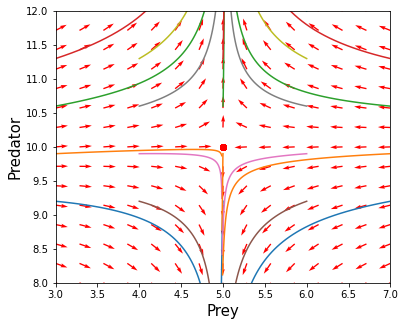

In [106]:
for i in range(n_ini):
    for j in range(n_ini):

        p = integrate.odeint(modified_lotka, [p0[0,i], p0[1,j]], t)
        plt.plot(p[:,0], p[:,1])
        plt.plot(ini2[0],ini2[1], 'bo')
        plt.plot(ini3[0],ini3[1], 'ro')

        
# Get limits of trajectory plot
# ymax = plt.ylim(ymin=0)[1]
# xmax = plt.xlim(xmin=0)[1]

nb_points = 15

x = np.linspace(3,7, nb_points)
y = np.linspace(8,12, nb_points)

X1 , Y1 = np.meshgrid(x,y)
DX1, DY1 = modified_lotka([X1, Y1])

# Direction at each grid point is the hypotenuse of the prey direction and the predator direction.
M = (np.hypot(DX1, DY1))
M[M == 0] = 1  # This is to avoid any divisions when normalizing

# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M

plt.quiver(X1, Y1, DX1, DY1, color='red')
# plt.xlim([0.3,0.7])
# plt.ylim([0.5,1.5])

plt.xlim([3,7])
plt.ylim([8,12])
plt.xlabel("Prey", fontsize = 15)
plt.ylabel("Predator", fontsize = 15)
plt.savefig('re_image/fig6-2.eps', format='eps')
plt.show()